## 从用户增长的角度进行电商数据分析

## 一、背景说明
1、数据来源：[https://www.kesci.com/mw/dataset/601e971ab233440015800bc7/file](https://www.heywhale.com/mw/dataset/601e971ab233440015800bc7/file)
2、本人根据之前的运营经验，从用户增长的角度，对数据进行了分析，多有不足，
3、数据属于自主探索，由于没有明确的业务需求，思路是从整体的数据观察出发，对发现的异常问题进行逐一分析，原代码在spyder编辑。



## 二、数据读取、清洗


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']

path = "C:\\Users\\Thomas Young\\Desktop\\ptyhon_data\\项目数据\\电子产品销售分析.csv"
data = pd.read_csv(path,encoding = 'utf8',dtype={'user_id':'int64'}) #这里对用户id指定了读取整数类型，后面会用到

In [2]:
'''---------------------------------------------数据清洗----------------------------------------------'''
#查看缺失值，并填补缺失
data.isnull().sum()  #只有category_code 和 brand 字段有缺失值
data['brand'].fillna('no_brand',inplace = True)
data['category_code'].fillna('missing_value',inplace = True)

#删除原数据的数字索引列，在处理重复数据
del data['Unnamed: 0']
data.drop_duplicates(inplace = True)
#处理时间字段event_time时，发现有1300多条数据的时间产生了1970年的错误字段，直接删掉；
data = data[data['event_time'].str[:4] != '1970']
data['event_time'] = pd.to_datetime(data['event_time'])
data['hour'] = data['event_time'].dt.hour
data['event_time'] = data['event_time'].dt.to_period('D')
data['month'] = data['event_time'].dt.month
#重设索引
data = data.set_index('event_time',drop = False)
data.head()
#数据清洗相对较简单，这里暂未发现什么问题

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,hour,month
event_time,,,,,,,,,,,,,
2020-04-24,2020-04-24,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1515915625441993984,24.0,女,海南,11,4
2020-04-24,2020-04-24,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1515915625447879424,38.0,女,北京,14,4
2020-04-24,2020-04-24,2294584263154074236,2273948316817424439,2.268105e+18,missing_value,karcher,217.57,1515915625443148032,32.0,女,广东,19,4
2020-04-26,2020-04-26,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1515915625450382848,20.0,男,重庆,8,4
2020-04-26,2020-04-26,2295740594749702229,1515966223509104892,2.268105e+18,electronics.smartphone,apple,1387.01,1515915625448766464,21.0,男,北京,9,4


## 三、数据分析
#### 1、订单初步分析
查看数据情况，电商数据，就按照时间维度，查看月销售额、月付费人数、月订单数、月arpu值等字段信息，了解店铺销售的基本情况；


In [50]:
#按照时间维度，月销售额、月付费人数、月订单数、月arpu值等；
df = data.groupby('month').agg({'price':'sum','user_id':'nunique','order_id':'count'})
df.columns = ['revenue','cust_count','order_count']
df['arpu'] = df['revenue'] / df['cust_count']
df['order_per_user'] = df.order_count / df.cust_count
df

,revenue,cust_count,order_count,arpu,order_per_user
month,,,,,
1,1.774467e+06,1866,14270,950.946913,7.647374
2,2.267810e+06,2299,17995,986.433180,7.827316
3,2.897486e+06,2624,18688,1104.224947,7.121951
4,1.699045e+06,5519,11851,307.853774,2.147309
5,7.755531e+06,17474,40241,443.832598,2.302907
6,7.688554e+06,14150,41328,543.360685,2.920707
7,1.632381e+07,30308,76251,538.597314,2.515870
8,2.796256e+07,35611,99893,785.222623,2.805116
9,1.714089e+07,19886,70444,861.957868,3.542392


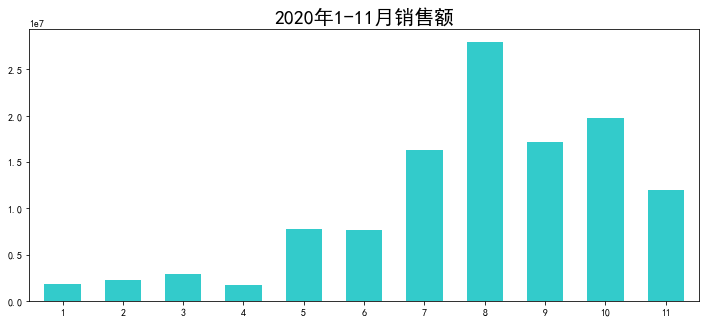

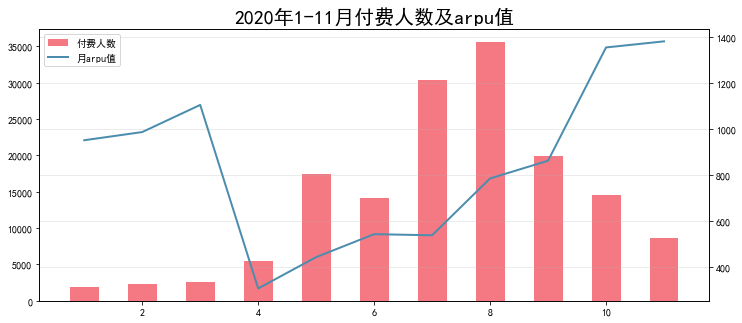

In [10]:
#作图1
df['revenue'].plot(kind = 'bar',
                   color = 'c',
                   alpha = 0.8,
                   width = 0.6,
                   label = '月收入',
                   figsize=(12,5))
plt.title('2020年1-11月销售额',fontsize = 20)
plt.xticks(rotation = 0)
plt.xlabel('')
#作图2
fig,ax = plt.subplots(figsize = (12,5))
ax1 = ax.twinx()
ax.bar(df.index,df['cust_count'].values,
       color = '#f47983',
       width = 0.5,
       label = '付费人数')
ax1.plot(df.index,df['arpu'].values,
         color = '#4c8dae',
         lw = 2,
         label = '月arpu值')
plt.xlabel('')
lines1, labels1 = ax.get_legend_handles_labels() #图例堆积显示的代码
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc=2)
plt.title('2020年1-11月付费人数及arpu值',fontsize = 20)
plt.grid(axis = 'y',alpha = 0.3)

* #观察图表，可以发现，收入从5月开始突然有了较大的增幅，8月到达顶峰，然后开始回落；
* #相应的月支付人数出现了相同的趋势，但是月arpu值却是在4月突降，然后在慢慢回升，一路上升；
* #数据在4月和9月分别出现了拐点，初步推测与引入的新支付用户有关（这里能看到的变量只有新用户，细心的还可以去看看商品结构、定价等是否有变化，这里数据有限不做过多分析）；
* #月人均订单数，前后都是7单，中间在大量新用户引入时变为2，可以想到引入用户的复购情况也值得探索；


#### 2、用户情况分析
由上述分析可知，店铺在拉新方面应该是出现了一些问题。
先看看整体拉新情况，新消的数量、质量等，在看整体的支付用户情况、用户发展情况；


In [11]:
#月新消人数、首单arpu、月复购率、月复购arpu等；
df_user = pd.pivot_table(data,columns='month',index='user_id',values='price',aggfunc='sum')
user_record = df_user.fillna(0)
user_record = user_record.applymap(lambda x: 1 if x > 0 else 0)
#构建函数，找到每月的新消用户（首次付费的用户）
def new(x):
    s = x.idxmax()
    x[s] = 'new'
    return(x)
user_record = user_record.apply(new,axis=1)
new_user_month = user_record.apply(lambda x: pd.value_counts(x)).T
new_user_month = new_user_month.drop([0,1],axis = 1)
new_user_month #得到了每个月的月新消人数
# new_user_month.plot(kind='bar')

,new
month,
1,1871.0
2,1655.0
3,1506.0
4,4250.0
5,14117.0
6,9087.0
7,22286.0
8,22239.0
9,8203.0


In [12]:
#继续计算新消用户的首单arpu和月复购arpu
#先计算首单流水、首单arpu
first_paid = {}
for i in range(1,12):
    order_i = data[data['month'] == i].drop_duplicates(subset='user_id',keep='first') #得到各月各用户首单
    user_id_i = user_record[user_record[i] == 'new'].index #得到各月新消用户id
    first_paid[i] = order_i[order_i['user_id'].isin(user_id_i)]['price'].sum() #求解新消首单流水
    
new_user_month['first_paid'] = first_paid.values()
new_user_month['first_paid_arpu'] = new_user_month['first_paid'] / new_user_month['new'] #首单arpu

In [13]:
#再计算复购人数、复购流水
df_user2 = pd.pivot_table(data,columns='month',index='user_id',values='order_id',aggfunc='count').fillna(0)
new_rep = {} #新消复购人数
re_paid = {} #复购流水
for i in range(1,12):
    user_id_i = user_record[user_record[i] == 'new'] #得到各月新消用户df
    order_id_i = df_user2[df_user2[i] >= 2].index #得到各月订单数大于1的用户id
    new_rep[i] = len(user_id_i[user_id_i.index.isin(order_id_i)]) #各月新消中订单大于1的，即复购的人数
    re_paid[i] = data[data['user_id'].isin(user_id_i.index)]['price'].sum() #新用户的月总流水

new_user_month['new_rep'] = new_rep.values() #新消复购人数
new_user_month['re_paid'] = re_paid.values() #新消月总流水
new_user_month['re_paid'] = new_user_month['re_paid'] - new_user_month['first_paid'] #相减得到新消复购流水
new_user_month['new_rep_rate'] = new_user_month['new_rep'] / new_user_month['new'] #当月复购率
new_user_month['re_paid_arpu'] = new_user_month['re_paid'] / new_user_month['new_rep'] #复购arpu
new_user_month['new_no_rep'] = new_user_month['new'] - new_user_month['new_rep'] #新消未复购用户
new_user_month

,new,first_paid,first_paid_arpu,new_rep,re_paid,new_rep_rate,re_paid_arpu,new_no_rep
month,,,,,,,,
1,1871.0,230158.48,123.013618,856,6487894.50,0.457509,7579.316005,1015.0
2,1655.0,231503.20,139.881088,807,4784687.43,0.487613,5928.980706,848.0
3,1506.0,283675.95,188.363845,754,4530899.01,0.500664,6009.149881,752.0
4,4250.0,693082.34,163.078198,1258,4118200.64,0.296000,3273.609412,2992.0
5,14117.0,3310528.34,234.506506,5041,10129868.54,0.357087,2009.495842,9076.0
6,9087.0,2467380.29,271.528589,3151,6055682.03,0.346759,1921.828635,5936.0
7,22286.0,5381363.17,241.468329,10640,13473929.74,0.477430,1266.346780,11646.0
8,22239.0,7487536.14,336.684929,11462,15815926.81,0.515401,1379.857513,10777.0
9,8203.0,2737624.52,333.734551,4655,8172745.36,0.567475,1755.691807,3548.0


Text(0.5, 1.0, '2020年各月新消用户复购金额及arpu')

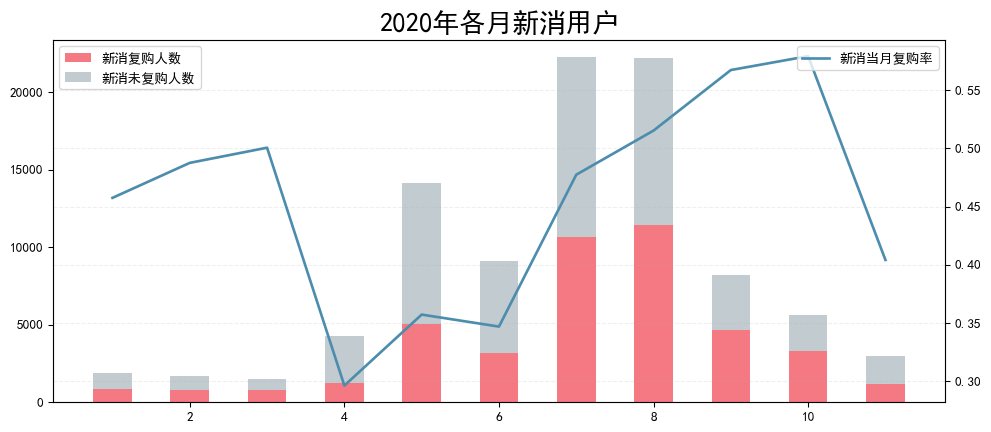

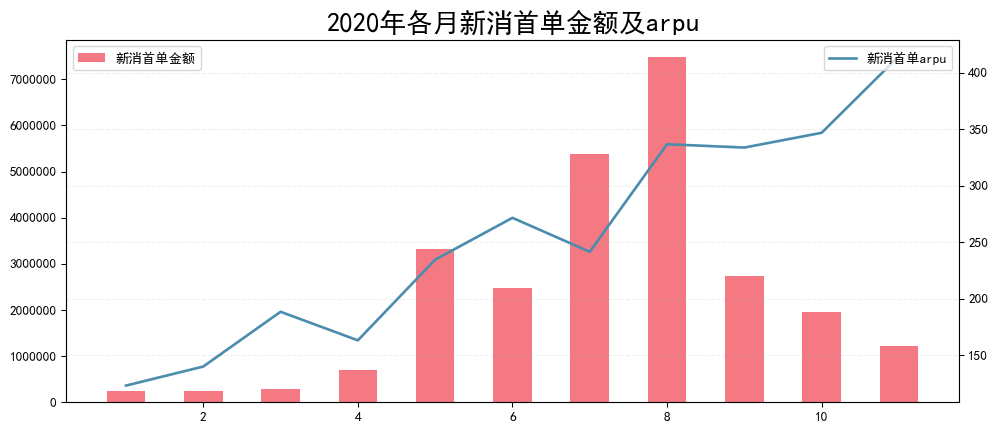

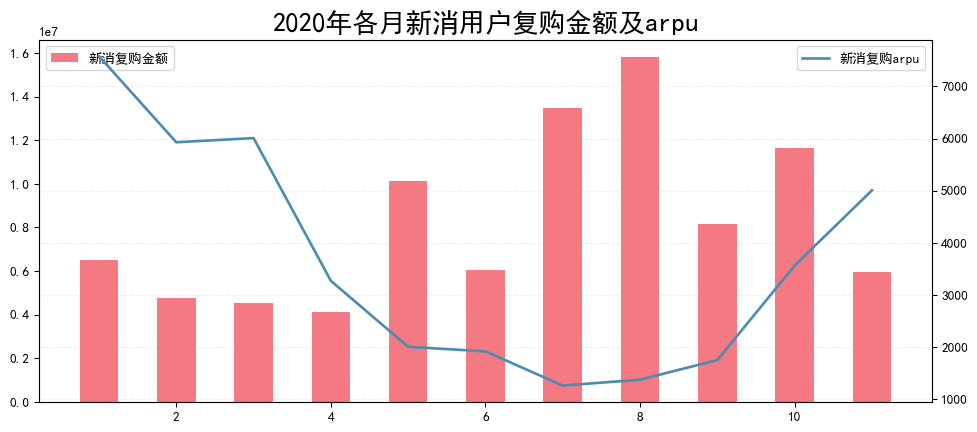

In [21]:
#作图1
fig,ax = plt.subplots(figsize=(12,5),dpi = 96)
ax1 = ax.twinx()
ax.bar(new_user_month.index,new_user_month['new_rep'].values,width=0.5,color ='#f47983',label='新消复购人数')
ax.bar(new_user_month.index,new_user_month['new_no_rep'].values,bottom=new_user_month['new_rep'].values,width=0.5,color = '#c2ccd0',label='新消未复购人数')
ax1.plot(new_user_month.index,new_user_month['new_rep_rate'].values,color = '#4c8dae',lw = 2,label = '新消当月复购率')
ax.legend(loc = 2)
ax1.legend(loc = 1)
plt.grid(alpha = 0.2,axis = 'y',ls = '--')
plt.title('2020年各月新消用户',fontsize = 20)
#作图2
fig,ax = plt.subplots(figsize=(12,5),dpi = 96)
ax1 = ax.twinx()
ax.bar(new_user_month.index,new_user_month['first_paid'].values,width=0.5,color ='#f47983',label='新消首单金额')
ax1.plot(new_user_month.index,new_user_month['first_paid_arpu'].values,color = '#4c8dae',lw = 2,label = '新消首单arpu')
ax.legend(loc = 2)
ax1.legend(loc = 1)
plt.grid(alpha = 0.2,axis = 'y',ls = '--')
plt.title('2020年各月新消首单金额及arpu',fontsize = 20)
#作图3
fig,ax = plt.subplots(figsize=(12,5),dpi = 96)
ax1 = ax.twinx()
ax.bar(new_user_month.index,new_user_month['re_paid'].values,width=0.5,color ='#f47983',label='新消复购金额')
ax1.plot(new_user_month.index,new_user_month['re_paid_arpu'].values,color = '#4c8dae',lw = 2,label = '新消复购arpu')
ax.legend(loc = 2)
ax1.legend(loc = 1)
plt.grid(alpha = 0.2,axis = 'y',ls = '--')
plt.title('2020年各月新消用户复购金额及arpu',fontsize = 20)
#数据标签、y轴量级偷懒就不处理了，主要看趋势。

从上图可以看出：
* #月新消人数的趋势和总的支付人数趋势基本一致，4-8月间有较大幅的增长，推测期间应该有较大投入进行拉新运营；
* #但新消用户质量似乎并不好，4月开始新消的复购arpu都是一路走低，且始终未回到3月前的arpu数据；4-7月的新消当月复购率低于前3个月，
* #新消的首单arpu却保持了稳定增长趋势，看来运营策略上应该对新用户的首单消费刺激较好，可惜复购不咋地；


In [27]:
#第1张图中只体现了新消的当月复购，运营上一般需要看后续在各月的持续复购情况；
#计算每个月的新消在之后各月的复购率
new_k = {}
for i in range(1,11):
    new_user = []
    df_new = user_record[user_record[i] == 'new']
    new_user.append(len(df_new)) 
    for j in range(i+1,12):
        new_j = df_new[j].sum()
        new_user.append(new_j)
    new_k[i] = new_user
    if i > 1:
        for k in range(i-1):
            new_k[i].insert(0,np.nan)
df_new_rep =  pd.DataFrame(new_k,index = range(1,12))
df_new_rep #columns是各个月，index是各月在之后各月的复购；

,1,2,3,4,5,6,7,8,9,10
1,1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,643,1655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,593,524.0,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,483,397.0,388.0,4250.0,NaN,NaN,NaN,NaN,NaN,NaN
5,832,697.0,652.0,1175.0,14117.0,NaN,NaN,NaN,NaN,NaN
6,811,686.0,651.0,746.0,2164.0,9087.0,NaN,NaN,NaN,NaN
7,739,646.0,572.0,1053.0,2787.0,2223.0,22286.0,NaN,NaN,NaN
8,791,681.0,612.0,1058.0,2748.0,1911.0,5571.0,22239.0,NaN,NaN
9,690,589.0,544.0,734.0,1829.0,1286.0,2587.0,3423.0,8203.0,NaN
10,447,344.0,324.0,504.0,1152.0,830.0,1611.0,2015.0,1725.0,5640.0


Text(0.5, 1.0, '各月新增用户复购率曲线')

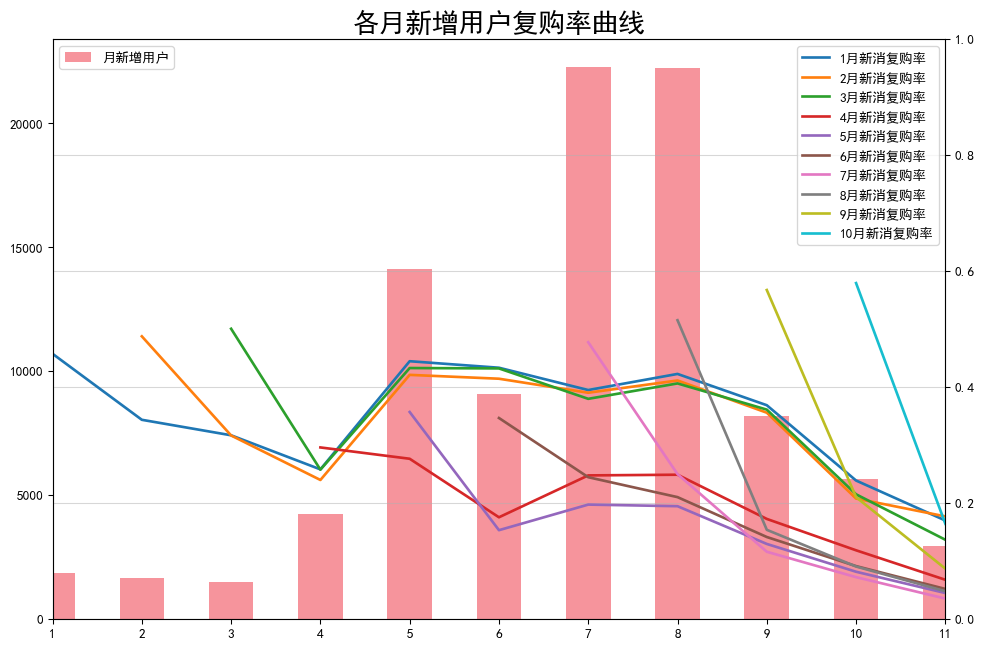

In [28]:
#转化为复购率
for n in range(1,11):
    df_new_rep[n] = df_new_rep[n] / df_new_rep[n][n]
    df_new_rep[n][n] = new_user_month['new_rep_rate'][n]
df_new_rep.columns = ['1月新消复购率','2月新消复购率','3月新消复购率','4月新消复购率','5月新消复购率','6月新消复购率','7月新消复购率','8月新消复购率','9月新消复购率','10月新消复购率']
#作图4
fig,ax = plt.subplots(figsize = (12,8),dpi=96)
ax2 = ax.twinx()
ax.bar(new_user_month.index,new_user_month['new'].values,color='#f47983',width=0.5,alpha = 0.8,label = '月新消用户')
df_new_rep.plot(kind = 'line',
                ylim = (0,1),
                lw = 2,
                ax = ax2)
plt.xticks(range(1,12))
ax.legend(loc=2)
plt.grid(alpha = 0.5)
plt.legend()
plt.title('各月新增用户复购率曲线',fontsize = 20)

从上述新消复购图可以发现：
* #1-3月的新消在后续的复购率明显优于4月之后的新消，侧面说明4月开始的拉新质量不太好；
* #5月开始实施的运营策略，极好的提升了之前新消用户的复购率，值得推广；
* #7、8月的新消增长是顶峰，次月的复购率才20%左右；


#### 3、用户情况进一步分析
#前面对拉新的用户进行了主要分析，进一步需要具体看看每月的所有支付用户情况，才能更全面的了解店铺的情况；


In [29]:
#运营上，根据用户前个周期的状态可以将其划分为5类：当月新消、上月新消本月复购、上月老消本月复购、上上月支付本月复购、流失2月+本月复购；
#构建函数，划分支付用户标签；
def customer_label(x):
    label = []
    for i in range(1,12):
        if x[i] == 0:
            label.append('unpaid')
        else:
            if i == 1:
                label.append('当月新消')
            elif i == 2:
                label.append('当月新消') if label[i-2] == 'unpaid' else label.append('上月新消本月复购')
            elif i == 3:
                if label[i-2] == 'unpaid':
                    label.append('当月新消') if label[i-3] == 'unpaid' else label.append('上上月支付本月复购')
                else:
                    label.append('上月新消本月复购') if label[i-3] == 'unpaid' else label.append('上月老消本月复购')
            else:
                if len(set(label)) == 1:  #之前元素全是unpaid
                    label.append('当月新消')
                elif label[i-2] == '当月新消':
                    label.append('上月新消本月复购')
                elif (label[i-2] != '当月新消') & (label[i-2] != 'unpaid'): #上月为1，且上月之前至少有一个1
                    label.append('上月老消本月复购')
                elif (label[i-2] == 'unpaid') & (label[i-3] != 'unpaid'):
                    label.append('上上月支付本月复购')
                elif (label[i-2] == 'unpaid') & (label[i-3] == 'unpaid'):
                    label.append('流失2月+本月复购')
                else:
                    label.append('其他')
    return(pd.Series(label,index=range(1,12)))

user_info = df_user.fillna(0).applymap(lambda x:1 if x > 0 else 0)
user_info = user_info.apply(customer_label,axis=1)
user_paid_label = user_info.apply(lambda x: pd.value_counts(x)).T.fillna(0) #月支付用户构成
del user_paid_label['unpaid']
user_paid_label.head()

,上上月支付本月复购,上月新消本月复购,上月老消本月复购,当月新消,流失2月+本月复购
1,0.0,0.0,0.0,1866.0,0.0
2,0.0,643.0,0.0,1655.0,0.0
3,270.0,524.0,323.0,1506.0,0.0
4,272.0,388.0,434.0,4250.0,174.0
5,752.0,1175.0,755.0,14117.0,674.0


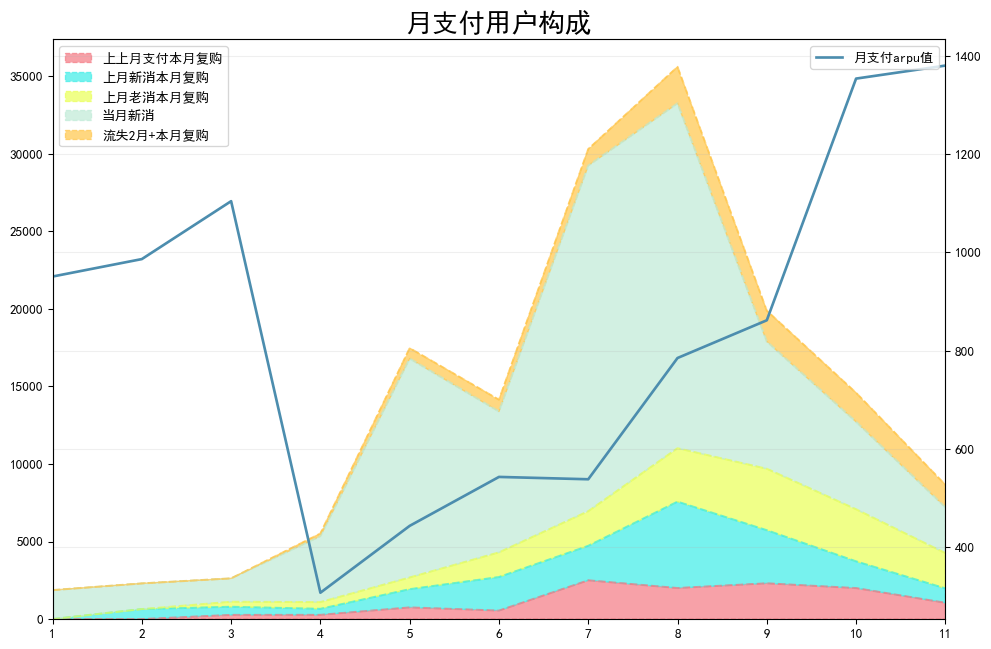

In [31]:
#作图：堆积图
fig,ax = plt.subplots(figsize = (12,8),dpi = 96)
ax1 = ax.twinx()
user_paid_label.plot(kind = 'area',
                     color=['#f47983','#3eede7','#eaff56','#c0ebd7','#ffc64b'],
                     alpha = 0.7,
                     linestyle = '--',
                     ax = ax)
ax1.plot(df.index,df['arpu'].values,
         color = '#4c8dae',
         lw = 2,
         label = '月支付arpu值')
plt.title('月支付用户构成',fontsize = 20)
plt.xticks(range(1,12))
ax.legend(loc=2)
ax1.legend(loc = 1)
plt.grid(alpha = 0.2)

图表分析：
* #支付用户构成图，可以细致了解到月付费人群的构成、质量；
* #4月开始月新消增长，当月arpu却最低，可以推测应该是采取了降价/发券/打折等拉新方式，付费人多但是实际收入少；
* #9月开始新消增长变少，arpu值却拐高，可以看到后面几个月的复购用户沉淀了不少，这也是后续收入能持续增长的原因；
* #8、9月份的流失用户回流做的不错；
* #这里没有在去细致做各人群的复购曲线，其实结合后面的用户生命周期分析可以发现，2个月（8周）内的用户的复购对这个店铺是很关键的；


In [32]:
#上图看了月支付用户的构成，继续看看用户的累积发展情况（有很多项目已经做过这个分析了，在此借鉴一下）；
def user_status(x):
    status = []
    for i in range(1,12):
        if x[i] == 0:
            if i == 1:
                status.append('unreg')
            else:
                status.append('unreg') if status[i-2] == 'unreg' else status.append('silent')
        else:
            if i == 1:
                status.append('new')
            else:
                status.append('new') if status[i-2] == 'unreg' else (status.append('return') if status[i-2] == 'silent' else status.append('active') )
    return(pd.Series(status,index = range(1,12)))

user_record = df_user.fillna(0).applymap(lambda x:1 if x > 0 else 0)
user_record = user_record.apply(user_status,axis = 1)
#对5种标签统计人数
user_type = user_record.apply(lambda x: pd.value_counts(x)).T.fillna(0).drop(columns='unreg')

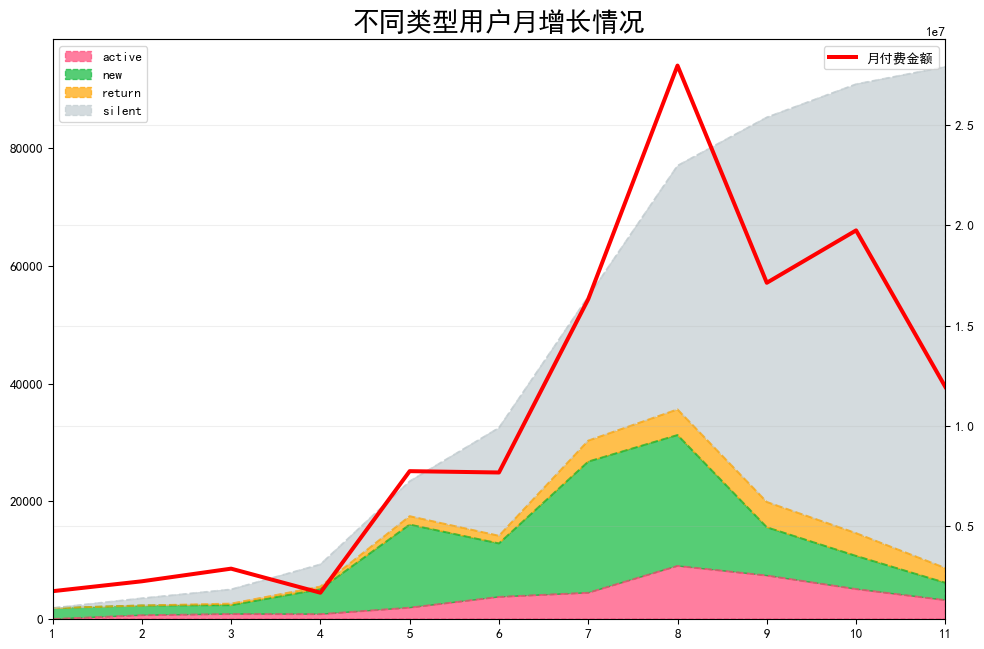

In [36]:
#作图
fig,ax = plt.subplots(figsize = (12,8),dpi = 96)
ax1 = ax.twinx()
user_type.plot(kind = 'area',
               color=['#ff4777','#0eb83a','#ffa400','#c2ccd0'],
               alpha = 0.7,
               linestyle = '--',
               ax = ax)
df['revenue'].plot(color = 'r',
                   ax =ax1,
                   lw = 3,
                   label = '月付费金额')
plt.title('不同类型用户月增长情况',fontsize = 20)
plt.legend()
plt.xticks(range(1,12))
plt.grid(alpha = 0.2)

说明：
* #其实这幅图中对用户的一些行为定义不够严谨，不过这个思路是很值得学习的，而且它的侧重应该是用户进入店铺后的成长情况；
* #可以发现，有大量用户最终变为了沉默用户流失掉了，去测算这个比例，可以得知拉新渠道的优劣以及拉新成本、效率等信息；
* #这里不在做过多分析；


#### 4、用户生命周期分析
* #上面对用户的构成情况进行了分析，了解了其行为、付费能力等信息，接下来需要继续对用户的属性进行分析，进一步了解其生命周期、成长体系等情况；
* 
* #用户运营上可以从横向、纵向2个维度对用户进行划分；
* #横向，按照用户付费次数，付费次数越多该用户越趋于稳定，将其分为：初级用户、成长用户、成熟用户；
* #纵向，按照支付间隔天数，大部分的支付都是在某个时间长度内发生的，将其分为：活跃用户、预警用户、沉默用户、流失用户；


In [3]:
#首先，定义用户的活跃、衰退等节点；
#查找用户最后两次付费间隔分布
df_paytimes = data.groupby('user_id').order_id.count().reset_index(drop = False)
data_1 = data[data['user_id'].isin(df_paytimes[df_paytimes['order_id'] >= 2].user_id)].reset_index(drop=True) #筛选掉订单次数小于2的用户
user_paytimes = data_1.pivot_table(index='user_id',columns='event_time',values='order_id',aggfunc='count').fillna(0)
#构建函数，获取每个用户的最后2次购买时间间隔天数；
def user_interval(x):
    mark = 0
    for i in range(1,len(x)+1):
        if x.iloc[-i] != 0:
            if mark == 0:
                a = i
                mark += 1
            else:
                a = i - a
                return(a)
interval_count = user_paytimes.apply(user_interval,axis = 1).dropna()
interval_count = pd.DataFrame(interval_count,columns=['interval_days'])
interval_counts = pd.DataFrame(interval_count['interval_days'].value_counts().sort_index())
interval_counts['rate_sum'] = interval_counts['interval_days'].cumsum()/interval_counts['interval_days'].sum()

Text(0.5, 1.0, '用户最近两次付费间隔分布（天）')

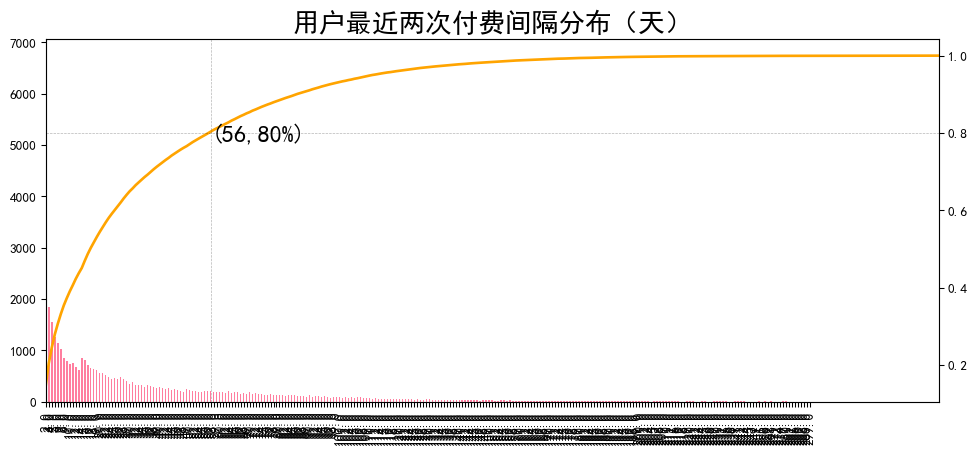

In [4]:
#作图：柱状图+帕累托图
fig,ax = plt.subplots(figsize = (12,5),dpi = 96)
ax1 =ax.twinx()
interval_counts['interval_days'].plot(kind = 'bar',
                                      color = '#ff4777',
                                      ax = ax,
                                      alpha = 0.7)
interval_counts['rate_sum'].plot(kind = 'line',
                                 color = '#ffa400',
                                 lw = 2)
plt.axhline(y = 0.8,c='black',ls = '--',lw = 0.5,alpha = 0.3)
plt.axvline(x = 56,c='black',ls = '--',lw = 0.5,alpha = 0.3)
plt.text(56,0.78,'(56,80%)',fontsize=18)
plt.title('用户最近两次付费间隔分布（天）',fontsize = 20)


In [5]:
#查找用户的相邻两次最大付费间隔；
#构建函数
def max_interval(x):
    a = []
    b = []
    for k in range(len(x)):
        if x.iloc[k] != 0:
            a.append(k)
    if len(a) >1:
        for n in range(len(a)-1):
            d = a[n+1] - a[n]
            b.append(d)
        return(max(b))
    else:
        return(np.nan)
max_interval_count = user_paytimes.apply(max_interval,axis = 1).dropna()
max_interval_count = pd.DataFrame(max_interval_count,columns=['max_interval'])
max_interval_counts = pd.DataFrame(max_interval_count['max_interval'].value_counts().sort_index())
max_interval_counts['rate_sum'] = max_interval_counts['max_interval'].cumsum()/max_interval_counts['max_interval'].sum()

Text(0.5, 1.0, '用户相邻两次最大付费间隔分布（天）')

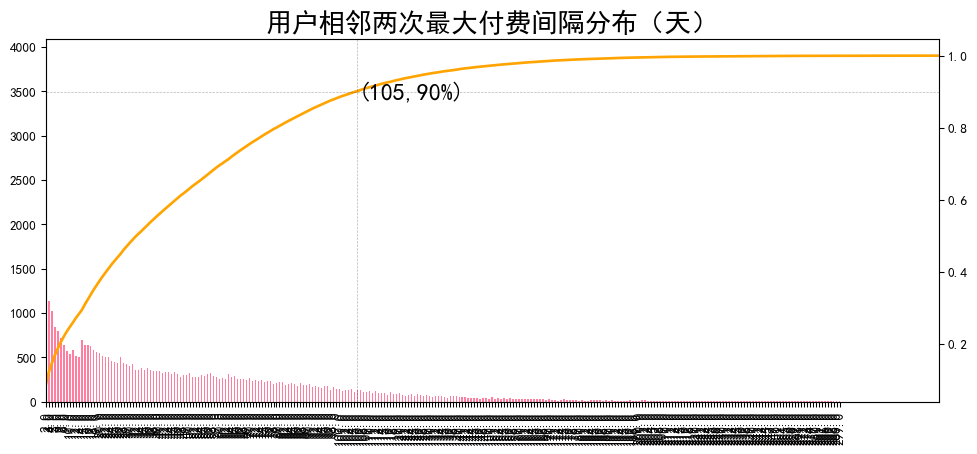

In [6]:
#作图：柱状图+帕累托图
fig,ax = plt.subplots(figsize = (12,5),dpi = 96)
ax1 =ax.twinx()
max_interval_counts['max_interval'].plot(kind = 'bar',
                                          color = '#ff4777',
                                          ax = ax,
                                          alpha = 0.7)
max_interval_counts['rate_sum'].plot(kind = 'line',
                                     color = '#ffa400',
                                     lw = 2)
plt.axhline(y = 0.9,c='black',ls = '--',lw = 0.5,alpha = 0.3)
plt.axvline(x = 105,c='black',ls = '--',lw = 0.5,alpha = 0.3)
plt.text(105,0.88,'(105,90%)',fontsize=18)
plt.title('用户相邻两次最大付费间隔分布（天）',fontsize = 20)

分析说明：
* #从最后两次付费间隔分布可以发现，70%的用户最后两次付费间隔在37天，80%的用户两次付费间隔在56天；90%的用户两次付费间隔在85天；
* #运营上可以将56天定义为衰退期节点，若用户首次下单后56天（8周）内未在发生付费行为，可以通过发推送、优惠券等形式进行召回；
* #相应的，新付费用户的重点运营期应该在56天（8周）内；
* #从相邻两次最大付费间隔分布可见，90%用户相邻两次最大付费时间小于105天，可以认为，如果用户超过105天（15周）没有付费行为，该用户已流失；
* #所以对用户的衰退、流失等周期定义为：最后一次付费距今0-5周的为活跃，5-8周为衰退，8-12周为预警，12-15周为沉默，15周以上为流失；


In [8]:
#接着，从横向定义用户的成长体系
#探查用户付费次数与复购率（留存）的关系
#先看看1-3月用户的订单量分布情况
orders_1_3 = data[data['month'] <= 3].groupby('user_id')[['order_id']].count()
#temp = data[data.user_id.isin(orders_1_3.sort_values().iloc[-2:-1].index)] 
#检查订单量最高的id时，发现数据可能存在问题，同一个id对应了多个用户信息，最高的几个id三个月订单高达四五百单显然有问题，这里只能继续分析

#order_1_3.describe()查看，最大订单数达到540，进行分箱
order_bins = [0,2,4,6,8,10,12,15,20,30,540]
orders_1_3['order_group'] = pd.cut(orders_1_3['order_id'],bins = order_bins,right = True)
orders_1_3['order_group'].value_counts(normalize = True).sort_index().cumsum()

(0, 2]       0.598966
(2, 4]       0.799085
(4, 6]       0.877462
(6, 8]       0.915059
(8, 10]      0.932763
(10, 12]     0.939924
(12, 15]     0.945494
(15, 20]     0.948677
(20, 30]     0.950865
(30, 540]    1.000000
Name: order_group, dtype: float64

* #可以发现90%订单在8单以内，所以后面重点分析前10内的订单用户的复购率；

In [9]:
#根据对该付费用户的活跃、预警、流失的时间划定，考察每个月1-15次支付次数用户，在次月的复购率情况；
pay_times = pd.DataFrame(np.ones((15,10),dtype=np.int),
                         columns=['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月'],
                         index=range(1,16))
for i in range(1,11):
    orders_samp = data[data['month'].isin([i])].groupby('user_id')[['order_id']].count() #样本用户
    orders_rep = data[data['month'].isin([i+1])].groupby('user_id')[['order_id']].count() #检验用户
    for k in range(1,16):
        user_k = len(orders_samp[orders_samp['order_id'] == k]) #订单数k的样本人数
        user_rep_k = len(orders_rep[orders_rep.index.isin(orders_samp[orders_samp['order_id'] == k].index)])
        pay_times.iloc[k-1,i-1] = user_rep_k / (100000 if user_k == 0 else user_k) #避免分母为零

pay_times #index为支付次数

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月
1,0.253465,0.281651,0.229730,0.282778,0.153202,0.244981,0.235423,0.146801,0.158519,0.131346
2,0.341026,0.330508,0.219203,0.374408,0.211642,0.322453,0.292972,0.188202,0.205971,0.175712
3,0.349693,0.357430,0.279152,0.514745,0.284188,0.368687,0.351736,0.233025,0.264390,0.232210
4,0.358696,0.409722,0.393750,0.554913,0.349486,0.413043,0.356659,0.247215,0.313107,0.263370
5,0.547170,0.283582,0.445946,0.576923,0.400602,0.472414,0.432377,0.325419,0.343137,0.329392
6,0.705882,0.340909,0.351852,0.758065,0.456731,0.478049,0.449645,0.316633,0.371200,0.393873
7,0.500000,0.647059,0.291667,0.722222,0.503937,0.588235,0.514706,0.347368,0.403302,0.344710
8,0.785714,0.384615,0.360000,0.666667,0.660550,0.554217,0.485149,0.344186,0.494595,0.426087
9,0.500000,0.222222,0.444444,0.833333,0.651515,0.550000,0.582938,0.397015,0.468468,0.449438
10,0.666667,0.714286,0.357143,0.833333,0.755556,0.666667,0.541899,0.488971,0.524038,0.437956


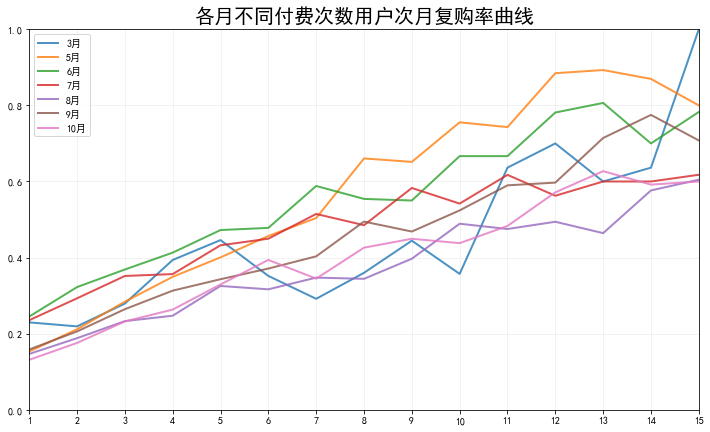

In [14]:
#作图
pay_times[['3月','5月','6月','7月','8月','9月','10月']].plot(kind='line',lw=2,alpha=0.8,label='次月复购率',
                                                             figsize=(12,7)) #剔除了1、2、4月的数据；
plt.title('各月不同付费次数用户次月复购率曲线',fontsize = 20)
plt.legend(loc = 0)
plt.xticks(range(1,16))
plt.ylim(0,1)
plt.grid(alpha = 0.2)

观察各个月的复购率曲线，可以发现：
* #复购率（留存）与付费次数是成正相关的；
* #付费次数在3-6次间，复购率提升较明显；
* #付费次数达到8-10后，复购率（留存）趋于稳定；
* #所以，可以将1-3次付费用户定义为初级用户，4-8次付费用户定义为成长用户，9次以上的定义为成熟用户；
* #这里可以用回归进行分析，可以更准确的定义拐点，但限于篇幅，加上数据应该有点问题，就不搞了。。。


#### 总结：
* #根据对用户的生命周期、成长程度的划分，可以将店铺目前的用户状况按照模型勾画出来；理论上当然是希望店铺的活跃成熟群体越多越好；
* #进一步可以在对各个状态的用户群细致分析，给出详细的用户运营建议；由于前面对数据分析时就发现数据应该存在去敏操作，就不再做进一步分析了；

#### 5、其他探索分析
根据个人兴趣，继续进行其他探索分析


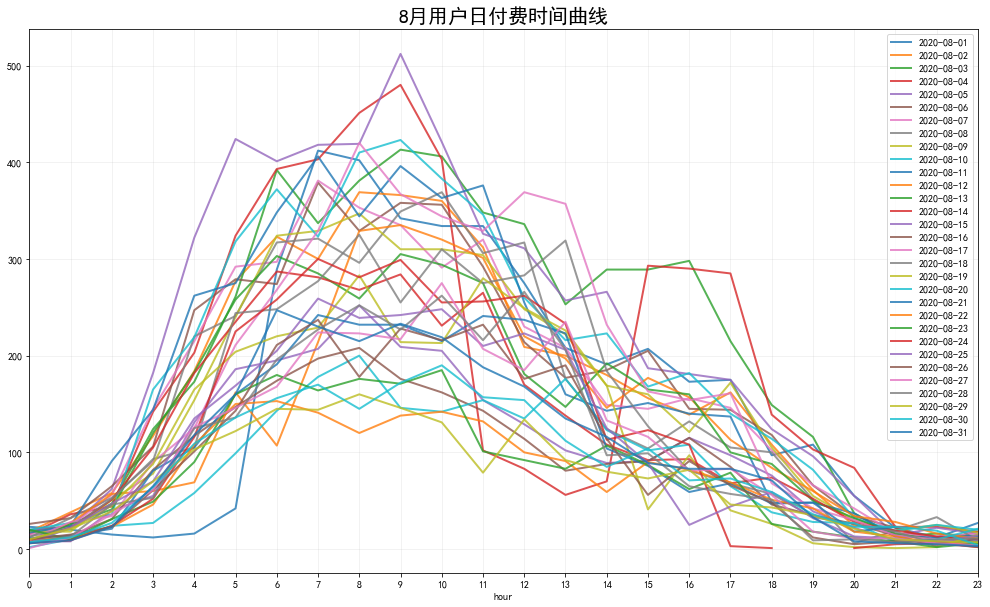

In [17]:
#每日付费时间分布
pay_days = data[data['month']==8].reset_index(drop=True).pivot_table(index='hour',columns='event_time',values='user_id',aggfunc='count')
#作图
pay_days.plot(kind='line',lw=2,alpha=0.8,figsize=(17,10))
plt.title('8月用户日付费时间曲线',fontsize = 20)
plt.legend(loc = 0)
plt.xticks(range(0,24))
plt.grid(alpha = 0.2)

* #作图用的是30天的数据，未取用均值，可以发现这个时间其实是utc时间，不可能凌晨3、4点就都起床开始买东西；
* #若要进一步分析，需要转化为北京时间；


还可以进行的分析：

* #人群特征分析-------------------------------------------
* #各地区人群的消费金额情况
* #可以发现，北上广的消费金额明显高于其他地区；
* 
* #年龄分析-------------------------------------------------
* #用户的年龄分布
* #年龄大部分集中在25-45之间；
* 
* #产品分析------------------------------------------------
* #不同品牌的销售情况；
* 
* #用户rfm分析---------------------------------------------
......